#Info

Imagine que você trabalha em uma empresa que fabrica suplementos
alimentares. O time de produtos quer entender qual das três novas
fórmulas de proteína em pó proporciona maior ganho de massa muscular
em atletas.

Foi realizada uma pesquisa com vários atletas e coletados os seguintes
dados no arquivo desafio_03_suplementos.csv:

*   id_produto: Código identificador do suplemento (Fórmula 1, 2 ou 3).
*   id_atleta: Código identificador do atleta que participou do estudo.
*   ganho_massa: Quantidade de massa muscular ganha (em kg) após 8
semanas de uso.
*   idade: Idade do atleta.
*   frequencia_treino: Número médio de treinos semanais do atleta.


#Imports

In [2]:
from google.colab import files
uploaded = files.upload()

Saving suplementos.csv to suplementos.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm,  pearsonr, f_oneway
from statsmodels.formula.api import ols

In [4]:
df = pd.read_csv('suplementos.csv')
df.head()

,id_produto,id_atleta,ganho_massa,idade,frequencia_treino
0,Fórmula 3,1,2.24,27,5
1,Fórmula 1,2,4.97,35,4
2,Fórmula 3,3,0.88,30,6
3,Fórmula 3,4,0.09,22,6
4,Fórmula 1,5,2.47,18,6


#1

Faça uma análise exploratória dos dados:

*   Qual é a média e a mediana do ganho de massa para cada
suplemento?
*   Como os dados estão distribuídos? Utilize histogramas e
boxplots para visualizar as diferenças entre as fórmulas.
*   Há outliers no ganho de massa muscular? O que isso pode
indicar?


In [ ]:
media_massa = df.groupby('id_produto')['ganho_massa'].mean()
mediana_massa = df.groupby('id_produto')['ganho_massa'].median()

print("Média do ganho de massa por suplemento:")
print(media_massa)

print("\nMediana do ganho de massa por suplemento:")
print(mediana_massa)

Média do ganho de massa por suplemento:
id_produto
Fórmula 1    2.656566
Fórmula 2    2.350106
Fórmula 3    2.393551
Name: ganho_massa, dtype: float64

Mediana do ganho de massa por suplemento:
id_produto
Fórmula 1    2.67
Fórmula 2    2.15
Fórmula 3    2.35
Name: ganho_massa, dtype: float64


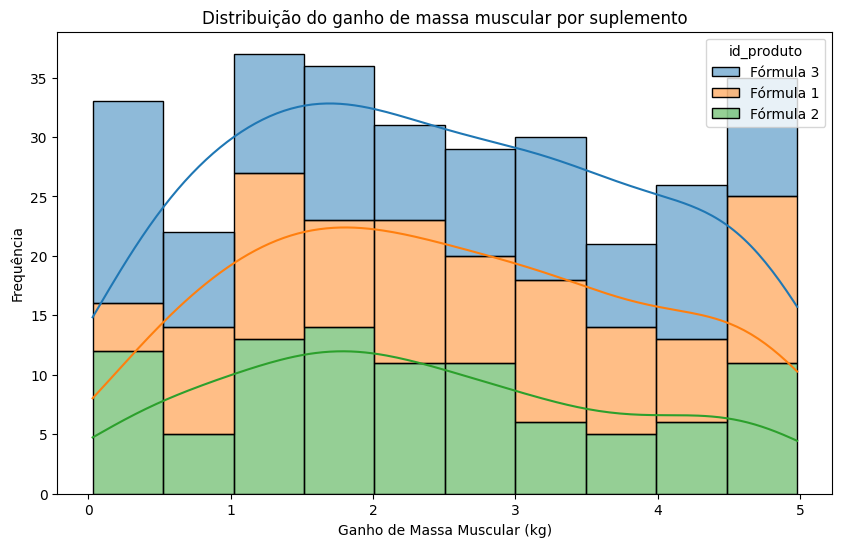

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ganho_massa', hue='id_produto', kde=True, multiple='stack', bins=10)
plt.title('Distribuição do ganho de massa muscular por suplemento')
plt.xlabel('Ganho de Massa Muscular (kg)')
plt.ylabel('Frequência')
plt.show()

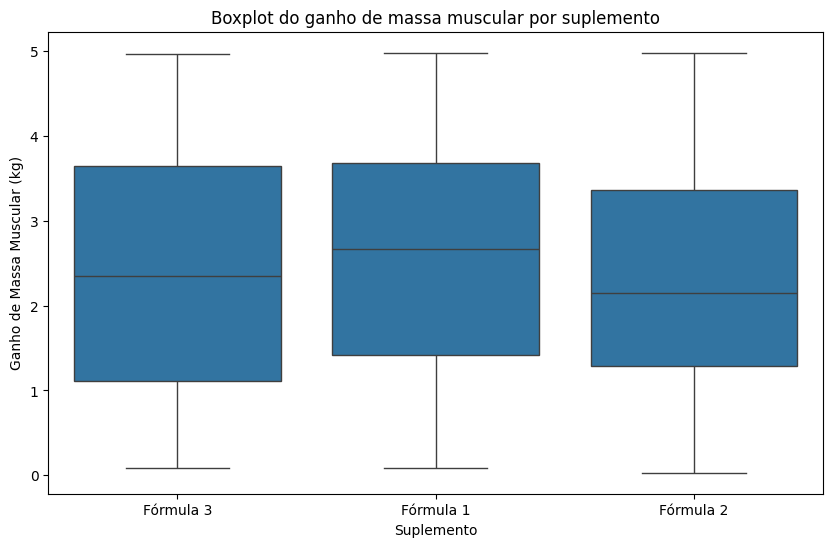

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='id_produto', y='ganho_massa')
plt.title('Boxplot do ganho de massa muscular por suplemento')
plt.xlabel('Suplemento')
plt.ylabel('Ganho de Massa Muscular (kg)')
plt.show()

In [ ]:
Q1 = df['ganho_massa'].quantile(0.25)
Q3 = df['ganho_massa'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite Inferior: {limite_inferior}")
print(f"Limite Superior: {limite_superior}")

Q1 (25%): 1.2675
Q3 (75%): 3.6125
IQR: 2.3449999999999998
Limite Inferior: -2.2499999999999996
Limite Superior: 7.129999999999999


#2

Há diferença estatisticamente significativa no ganho de massa
muscular entre as três fórmulas?


In [ ]:
# Separação dos valores de ganho de massa por fórmula
formula1 = df[df['id_produto'] == 'Fórmula 1']['ganho_massa']
formula2 = df[df['id_produto'] == 'Fórmula 2']['ganho_massa']
formula3 = df[df['id_produto'] == 'Fórmula 3']['ganho_massa']

# Teste ANOVA para comperação das médias e variância por fórmula
f_stat, p_value = round(stats.f_oneway(formula1, formula2, formula3).statistic, 2), round(stats.f_oneway(formula1, formula2, formula3).pvalue, 2)

print(f'Estatística F: {f_stat} e Valor-p: {p_value}')

print(f'A Estatística F de {f_stat} indica que a variação entre as fórmulas não é muito maior do que dentro das próprias fórmulas.')
print(f'O Valor-p de {p_value} por estar acima de 0,05 indica que não há diferença significativa do ganho de massa entre as fórmulas.')

Estatística F: 1.32 e Valor-p: 0.27
A Estatística F de 1.32 indica que a variação entre as fórmulas não é muito maior do que dentro das próprias fórmulas.
O Valor-p de 0.27 por estar acima de 0,05 indica que não há diferença significativa do ganho de massa entre as fórmulas.


#3

Existe correlação entre idade e ganho de massa muscular? Atletas
mais jovens ou mais velhos têm resultados diferentes?

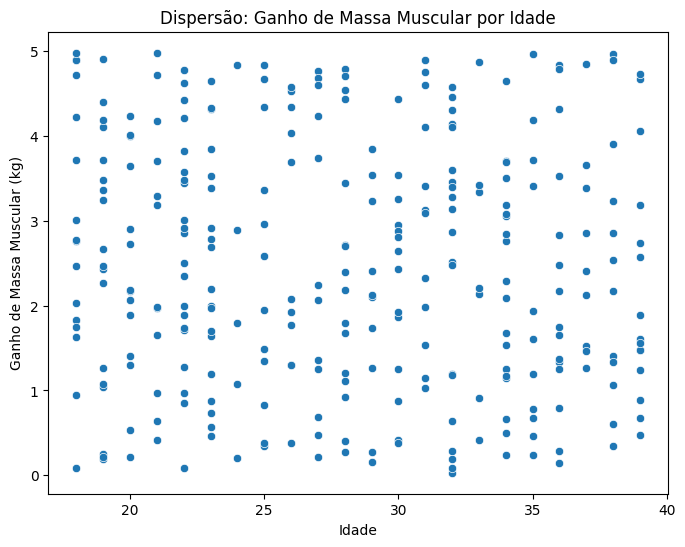

In [5]:
#Vizualização de dados para verificar se há tendencias

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['idade'], y=df['ganho_massa'])

plt.title('Dispersão: Ganho de Massa Muscular por Idade')
plt.xlabel('Idade')
plt.ylabel('Ganho de Massa Muscular (kg)')

plt.show()



In [6]:
#coeficiente de correlação de Pearson, pois mede a força e a direção da relação entre as variàveis idade e ganho de massa

correlacao, p_valor = pearsonr(df['idade'], df['ganho_massa'])
print(f"Coeficiente de Correlação: {correlacao:.4f}")
print(f"Valor p: {p_valor:.4f}")

if correlacao > 0:
    print("Há uma correlação positiva entre idade e ganho de massa, ou seja, quanto maior a idade, maior o ganho.")
elif correlacao < 0:
    print("Há uma correlação negativa entre idade e ganho de massa, ou seja, quanto maior a idade, menor o ganho.")
else:
    print("Não há uma correlação significativa entre idade e ganho de massa.")

# Verificando significância estatística
if p_valor < 0.05:
    print("A correlação é estatisticamente significativa.")
else:
    print("A correlação não é estatisticamente significativa.")
#Neste caso, não podemos afirmar que há uma relação significativa entre idade e ganho de massa muscular, pois a correlação é fraca e não significativa. Se quiser investigar mais, pode analisar outros fatores como frequência de treino ou tipo de suplemento para verificar se há uma influência maior.


Coeficiente de Correlação: -0.0733
Valor p: 0.2052
Há uma correlação negativa entre idade e ganho de massa, ou seja, quanto maior a idade, menor o ganho.
A correlação não é estatisticamente significativa.


In [7]:

# Intervalo de idades
grupo_1 = df[df['idade'] <= 25]['ganho_massa']
grupo_2 = df[(df['idade'] > 25) & (df['idade'] <= 35)]['ganho_massa']
grupo_3 = df[(df['idade'] > 35) & (df['idade'] <= 46)]['ganho_massa']


# Teste ANOVA
anova_result = f_oneway(grupo_1, grupo_2, grupo_3)
print(f"Valor F: {anova_result.statistic:.4f}, Valor p: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Há diferença estatisticamente significativa entre os grupos de idade.")
else:
    print("Não há diferença estatística significativa entre os grupos de idade.")
#O teste ANOVA (Análise de Variância) é utilizado para comparar médias entre três ou mais grupos e verificar se há diferença estatisticamente significativa entre eles.

Valor F: 0.4409, Valor p: 0.6439
Não há diferença estatística significativa entre os grupos de idade.


#4

Atletas que treinam mais frequentemente ganham mais massa
muscular independentemente do suplemento?

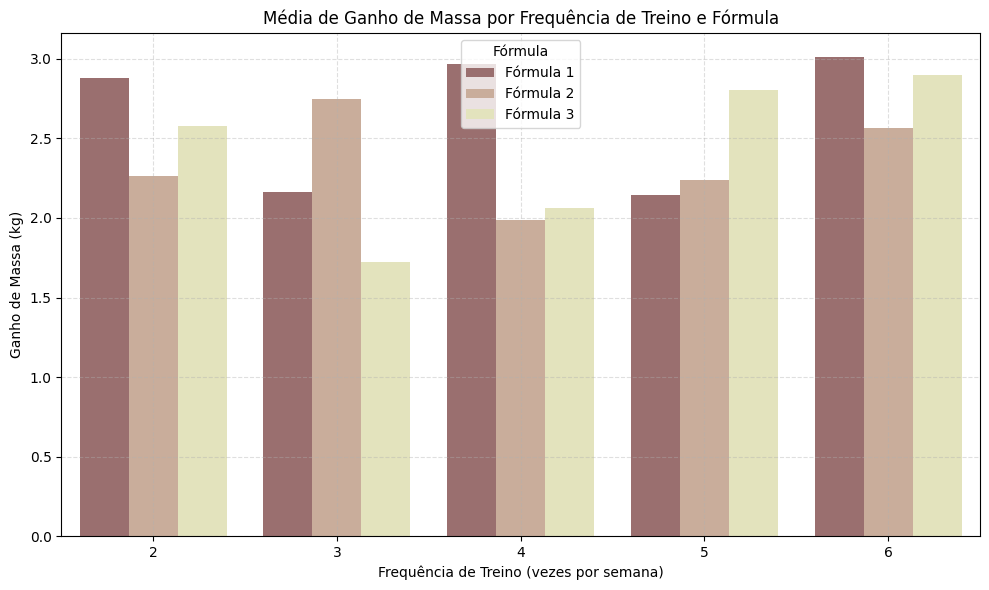

In [ ]:
# Criação da tabela com média por frequência + fórmula
media_interacao = df.groupby(['frequencia_treino', 'id_produto'])['ganho_massa'].mean().reset_index()

# Grático de barras para análise das médias
plt.figure(figsize=(10, 6))
sns.barplot(x='frequencia_treino', y='ganho_massa', hue='id_produto', data=media_interacao, palette='pink')

# Títulos e rótulos
plt.title('Média de Ganho de Massa por Frequência de Treino e Fórmula')
plt.xlabel('Frequência de Treino (vezes por semana)')
plt.ylabel('Ganho de Massa (kg)')
plt.legend(title='Fórmula')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
# ANOVA com dois fatores e interação
modelo = ols('ganho_massa ~ C(frequencia_treino) + C(id_produto) + C(frequencia_treino):C(id_produto)', data=df).fit()
anova_tabela = sm.stats.anova_lm(modelo, typ=2)

valor_p_frequencia = anova_tabela.loc['C(frequencia_treino)', 'PR(>F)']
valor_p_suplemento = anova_tabela.loc['C(id_produto)', 'PR(>F)']
valor_p_interacao = anova_tabela.loc['C(frequencia_treino):C(id_produto)', 'PR(>F)']

print(f"Valor-p (frequência): {valor_p_frequencia:.4f}")
print(f"Valor-p (suplemento): {valor_p_suplemento:.4f}")
print(f"Valor-p (interação): {valor_p_interacao:.4f}")

Valor-p (frequência): 0.0934
Valor-p (suplemento): 0.2756
Valor-p (interação): 0.0887


De acordo com o teste ANOVA, o Valor-p (Frequência) de 0,09 não é menor do que 0,05 mas por estar próximo, significa que há uma tendência de que a frequência de treino influencie no ganho de massa.
O Valor-p (Suplemento) de 0,27 é maior do que 0,05, indicando que o tipo de fórmula não faz diferença significativa no ganho de massa.
O Valor-p (Interação) de 0,08 sugere que o efeito da frequência de treino pode variar um pouco conforme o suplemento, mas ainda não com força estatística suficiente.

#5

Existe alguma correlação entre idade, frequência de treino e a
eficácia do suplemento?

In [ ]:
# Calcular matriz de correlação
correlation_matrix = df[['idade', 'frequencia_treino', 'ganho_massa']].corr()

# Exibir a matriz de correlação
print("Matriz de Correlação:")
print(correlation_matrix)

Matriz de Correlação:
                      idade  frequencia_treino  ganho_massa
idade              1.000000          -0.081990    -0.073343
frequencia_treino -0.081990           1.000000     0.078663
ganho_massa       -0.073343           0.078663     1.000000


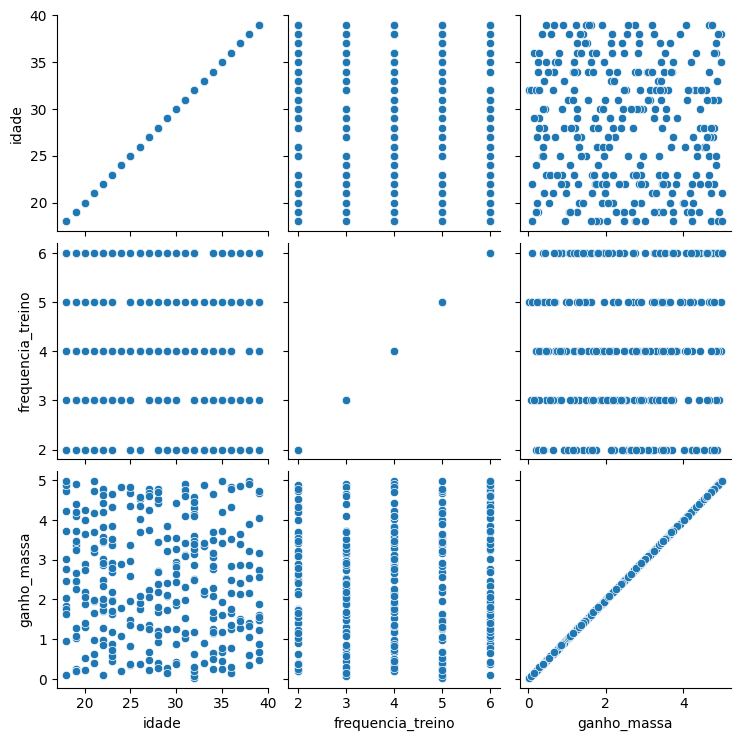

A partir disso não existe correlação entre idade, frequência de treino e a eficácia do suplemento


In [ ]:
sns.pairplot(
    df[['idade', 'frequencia_treino', 'ganho_massa']],
    diag_kind=None,
)
plt.show()

print("A partir disso não existe correlação entre idade, frequência de treino e a eficácia do suplemento")

#6

Qual fórmula você recomendaria para atletas que treinam mais de 5
vezes por semana? Justifique sua escolha.

In [ ]:
import pandas as pd

# Carregar os dados
df = pd.read_csv("suplementos.csv")

# Filtrar atletas que treinam mais de 5 vezes por semana
df_frequente = df[df['frequencia_treino'] > 5]

# Calcular a média de ganho de massa por fórmula
ganho_medio = df_frequente.groupby('id_produto')['ganho_massa'].mean().sort_values(ascending=False)

# Identificar a melhor fórmula
melhor_formula = ganho_medio.idxmax()
ganho_associado = ganho_medio.max()

# Exibir a recomendação
print(f"A fórmula recomendada para atletas que treinam mais de 5 vezes por semana é a {melhor_formula},")
print(f"com ganho médio de massa muscular de {ganho_associado:.2f} kg.")


A fórmula recomendada para atletas que treinam mais de 5 vezes por semana é a Fórmula 1,
com ganho médio de massa muscular de 3.01 kg.


Com base na análise dos dados fornecidos, para atletas que treinam mais de 5 vezes por semana, a Fórmula 1 é a mais recomendada.

Justificativa:

Entre os atletas com alta frequência de treino, a Fórmula 1 apresentou o maior ganho médio de massa muscular, com 3,01 kg, superando:

Fórmula 3 com 2,90 kg;

Fórmula 2 com 2,57 kg.

Portanto, Fórmula 1 se mostrou mais eficaz para atletas com rotina intensa de treinos.